# Support Vector Machine
### Nataly Neira 614212782
### Sebastian Mantilla 614221025

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statistics as sts
import datetime
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix,mean_squared_error, r2_score
from sklearn import datasets
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

In [ ]:
data = pd.read_csv("Crime_Data_from_2020_to_Present.csv")
data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918443 entries, 0 to 918442
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           918443 non-null  int64  
 1   Date Rptd       918443 non-null  object 
 2   DATE OCC        918443 non-null  object 
 3   TIME OCC        918443 non-null  int64  
 4   AREA            918443 non-null  int64  
 5   AREA NAME       918443 non-null  object 
 6   Rpt Dist No     918443 non-null  int64  
 7   Part 1-2        918443 non-null  int64  
 8   Crm Cd          918443 non-null  int64  
 9   Crm Cd Desc     918443 non-null  object 
 10  Mocodes         790151 non-null  object 
 11  Vict Age        918443 non-null  int64  
 12  Vict Sex        796365 non-null  object 
 13  Vict Descent    796356 non-null  object 
 14  Premis Cd       918433 non-null  float64
 15  Premis Desc     917886 non-null  object 
 16  Weapon Used Cd  317500 non-null  float64
 17  Weapon Des

In [ ]:
data.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,9.184430e+05,918443.000000,918443.000000,918443.000000,918443.000000,918443.000000,918443.000000,918433.000000,317500.000000,918432.000000,66784.000000,2251.000000,65.000000,918443.000000,918443.000000
mean,2.182520e+08,1337.260666,10.701887,1116.626374,1.410659,500.832354,29.573729,306.578338,363.482567,500.575810,957.958104,983.730786,987.353846,33.989769,-118.062475
std,1.205523e+07,652.784076,6.101791,610.196881,0.491954,207.584858,21.858617,217.402431,123.709042,207.377428,110.611792,52.636687,41.137130,1.693282,5.869872
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,310.000000,740.000000,0.000000,-118.667600
25%,2.104105e+08,900.000000,6.000000,615.000000,1.000000,331.000000,0.000000,101.000000,310.000000,331.000000,998.000000,998.000000,998.000000,34.014500,-118.429700
50%,2.205166e+08,1415.000000,11.000000,1141.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.058700,-118.322100
75%,2.305083e+08,1900.000000,16.000000,1615.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.163600,-118.273900
max,2.499046e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


In [ ]:
data.isna().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           128292
Vict Age               0
Vict Sex          122078
Vict Descent      122087
Premis Cd             10
Premis Desc          557
Weapon Used Cd    600943
Weapon Desc       600943
Status                 0
Status Desc            0
Crm Cd 1              11
Crm Cd 2          851659
Crm Cd 3          916192
Crm Cd 4          918378
LOCATION               0
Cross Street      774119
LAT                    0
LON                    0
dtype: int64

In [ ]:
missing_v = pd.DataFrame(data.isna().sum())
missing_v = missing_v.rename(columns = {0: 'sum_missing_values'})
missing_v['porcentaje'] = (missing_v['sum_missing_values']/len(data))*100
missing_v

,sum_missing_values,porcentaje
DR_NO,0,0.000000
Date Rptd,0,0.000000
DATE OCC,0,0.000000
TIME OCC,0,0.000000
AREA,0,0.000000
AREA NAME,0,0.000000
Rpt Dist No,0,0.000000
Part 1-2,0,0.000000
Crm Cd,0,0.000000
Crm Cd Desc,0,0.000000


In [ ]:
columns_to_drop = missing_v[missing_v['porcentaje'] >= 10].index
data = data.drop(columns=columns_to_drop)
data.isna().sum()

DR_NO            0
Date Rptd        0
DATE OCC         0
TIME OCC         0
AREA             0
AREA NAME        0
Rpt Dist No      0
Part 1-2         0
Crm Cd           0
Crm Cd Desc      0
Vict Age         0
Premis Cd       10
Premis Desc    557
Status           0
Status Desc      0
Crm Cd 1        11
LOCATION         0
LAT              0
LON              0
dtype: int64

Se han seleccionado y eliminado las columnas que tienen más del 10% de datos faltantes.
Para efectos de este modelo, se eliminarán [LOCATION], [LAT], [LON] que tienen la misma información del Área
Se eliminan también los datos faltantes de las columnas Premis Cd, Premis Desc y Crm Cd 1 para no afectar el modelo.
Se elimina también Date Rptd y Crm Cd 1 ya que no aportan información adicional al modelo al igual que las descripciones de Premis y Status y Crime Code.

De igual manera se eliminan los datos en los que la edad es cero para no afectar el desempeño del modelo ya que estos datos que son erroneos pueden introducir un sesgo.

In [ ]:
data = data.dropna()
data = data.drop(columns=['Date Rptd','DR_NO','Premis Desc','Status Desc','LOCATION','LAT','LON', 'Crm Cd 1', 'Crm Cd Desc', 'AREA NAME'])
data = data[data['Vict Age'] > 0]
data.isna().sum()

DATE OCC       0
TIME OCC       0
AREA           0
Rpt Dist No    0
Part 1-2       0
Crm Cd         0
Vict Age       0
Premis Cd      0
Status         0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 686153 entries, 1 to 918441
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   DATE OCC     686153 non-null  object 
 1   TIME OCC     686153 non-null  int64  
 2   AREA         686153 non-null  int64  
 3   Rpt Dist No  686153 non-null  int64  
 4   Part 1-2     686153 non-null  int64  
 5   Crm Cd       686153 non-null  int64  
 6   Vict Age     686153 non-null  int64  
 7   Premis Cd    686153 non-null  float64
 8   Status       686153 non-null  object 
dtypes: float64(1), int64(6), object(2)
memory usage: 52.3+ MB


# Tratamiento de variables categóricas

Con las 10 columnas que nos quedan, tenemos 2 columnas categóricas que no son de tipo numérico. Vamos transformar los datos de estas columnas en datos numéricos.

In [ ]:
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')
data=data[data['DATE OCC'].dt.year == 2023]
data['DATE OCC'] = data['DATE OCC'].dt.month.astype(int)
data.head()

<ipython-input-10-f9fab98d8766>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DATE OCC'] = data['DATE OCC'].dt.month.astype(int)


,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Status
644087,2,1630,1,191,1,440,48,502.0,IC
644088,9,1030,15,1549,1,230,36,101.0,IC
644089,4,816,1,192,1,331,25,108.0,IC
644090,11,800,6,663,2,662,46,502.0,IC
644091,7,20,5,509,2,901,51,502.0,AA


Primero lo hacemos con la columna Date Occ, Para  el  uso de este  tipo de clasificación restringiremos los datos  al  año  2023,  lo cual  agilizara el tiempo de ejecución  y reasignamos los  datos del mes  a la  columna Date Occ.

In [ ]:
status_cont=data.groupby(['Status']).size().reset_index(name='conteo')
status_cont

,Status,conteo
0,AA,13106
1,AO,19710
2,CC,2
3,IC,133674
4,JA,589
5,JO,388


In [ ]:
#Mapeo Status
mapeo_status={'AA':0,'AO':1,'CC':2,'IC':3,'JA':4,'JO':5}
data['Status']=data['Status'].map(mapeo_status)

In [ ]:
data.head()

,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Status
644087,2,1630,1,191,1,440,48,502.0,3
644088,9,1030,15,1549,1,230,36,101.0,3
644089,4,816,1,192,1,331,25,108.0,3
644090,11,800,6,663,2,662,46,502.0,3
644091,7,20,5,509,2,901,51,502.0,0


Ahora vamos a clasificar las edades de la victima en diferentes buckets para tratar mejor los datos categóricos.

In [ ]:
def map_age_group(age):
    if age <= 18:
        return 1
    else:
        return 2

data['Vict Age'] = data['Vict Age'].apply(map_age_group)

Vamos a  clasificar  los datos  de TIME OCC  en  caterigorias  que  identifican  partes del día.


In [ ]:
def map_time_group(time):
    if time < 6:
        return 1
    elif time <12:
      return 2
    elif  time <16:
      return 3
    else:
        return 4

data['TIME OCC'] = data['TIME OCC'].apply(map_time_group)



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167469 entries, 644087 to 875006
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   DATE OCC     167469 non-null  int64  
 1   TIME OCC     167469 non-null  int64  
 2   AREA         167469 non-null  int64  
 3   Rpt Dist No  167469 non-null  int64  
 4   Part 1-2     167469 non-null  int64  
 5   Crm Cd       167469 non-null  int64  
 6   Vict Age     167469 non-null  int64  
 7   Premis Cd    167469 non-null  float64
 8   Status       167469 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 12.8 MB


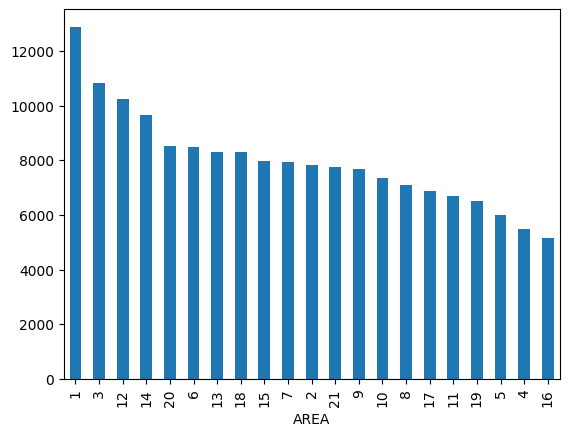

In [ ]:
conteo_valores = data['AREA'].value_counts()
conteo_valores.plot(kind='bar')
plt.show()

Restringimos  el  Area  a las  3 areas  con mayores casos,  el Area 1, 3, 12

In [ ]:
data1=data[(data['AREA'] == 1) | (data['AREA']==3) | (data['AREA']==12)]
data1.head()

,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Status
644087,2,4,1,191,1,440,2,502.0,3
644089,4,4,1,192,1,331,2,108.0,3
644095,2,4,1,191,1,341,2,707.0,3
644105,3,4,12,1258,2,354,2,501.0,3
644107,7,4,12,1258,2,930,2,501.0,1


# Predicción del Area

In [ ]:
# Separamos en Variables independientes y objetivo
X = data1.drop(columns=['AREA'])
y = data1['AREA']

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rfe = RFE(rf_classifier, n_features_to_select=3)
X_rfe = rfe.fit_transform(X, y)

selected_features = X.columns[rfe.support_]
selected_features

Index(['Rpt Dist No', 'Crm Cd', 'Premis Cd'], dtype='object')

In [ ]:
## Separamos de nuevo las variables reduciendo el set X
X = data1[['Crm Cd', 'Premis Cd']]
y = data1['AREA']
#Separamos nuestros datasets de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Escalamos todos los features para evitar sesgos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Una  vez  separados los  datos  y   encontrado las  variables  dependientes  graficamos  para  tener una  idea  de que  kernel puede  usarse


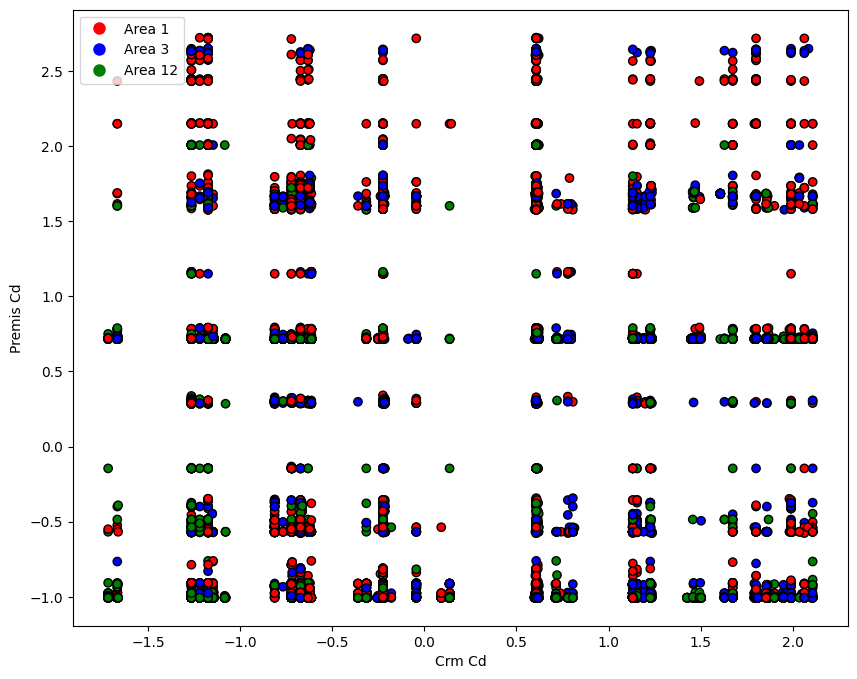

In [ ]:
color_map = {1: 'red', 3: 'blue', 12: 'green'}
colors = [color_map[label] for label in y_train]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

# Graficar los puntos de datos
scatter = ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=colors, edgecolors='k')

# Añadimos etiquetas y título
ax.set_xlabel('Crm Cd')
ax.set_ylabel('Premis Cd')

legend_labels = ['Area 1', 'Area 3', 'Area 12']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in color_map.items()]
ax.legend(handles=legend_handles, labels=legend_labels)

plt.show()

# Clasificación con SVM
Support vector machine (SVM) es un algoritmo de aprendizaje supervisado. El objetivo del algoritmo SVM es encontrar un hiperplano que separe de la mejor forma posible dos clases diferentes de puntos de datos.

 “De la mejor forma posible”  implica que en la mayoría de los problemas prácticos, el algoritmo maximiza el margen flexible permitiendo un pequeño número de clasificaciones erróneas.

Para el uso de este clasificador  es necesario un Kernel, la funcion del kernel  es asignanar los datos a un espacio dimensional diferente,para  que resulte más fácil separar las clases, sin tener que transformal  los  datos especificamente [1].

Algunos  Kernel usados  son:

**Función radial , RBF  o  gaussiana**
$$K(x_1,x_2)=e^{\frac{−∥x_1−x_2∥^2}{2σ^2}}$$

**Lineal**
$$K(x_1,x_2)=x^T_1x_2$$

**Polinomica**
$$K(x_1,x_2)=(x^T_1x_2+1)^ρ$$

**Sigmoide**
$$K(x_1,x_2)=tanh(β_0x^T_1x_2+β_1)$$

Aunque este clasificador está formulado para la clasificación binaria, los algoritmos SVM multiclase se construyen combinando varios clasificadores binarios.








Usaremos  SVM  para  predecir   El  area donde ocurre el crimen

In [ ]:
# Entrenamos el modelo
svm_classifier= SVC(kernel='rbf')
svm_classifier.fit(X_train_scaled, y_train)

# Predecimos los demás valores
y_pred = svm_classifier.predict(X_test_scaled)

In [ ]:
#Revisamos las métricas:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.50      0.60      0.54      2567
           3       0.45      0.11      0.18      2152
          12       0.41      0.63      0.50      2065

    accuracy                           0.45      6784
   macro avg       0.45      0.45      0.41      6784
weighted avg       0.46      0.45      0.41      6784



# Clasificación con K-means
 K-means es un algoritmo de clasificación no supervisada que agrupa objetos en k grupos basándose en sus características. Este  se realiza  minimizando la suma de distancias entre cada objeto y el centroide de su grupo [2]

 $$min E(μ_i)=min ∑_{i=1}^k∑_{x_i\in S}^i ∥x_j-μ_i∥^2$$



para  realizar  esta  clasificación  usaremos   k-means    para clasificar el area,  

In [ ]:
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(X_train_scaled)

# Predecimos los demás valores
y_pred = kmeans.predict(X_test_scaled)

In [ ]:
centroides = kmeans.cluster_centers_
etiquetas = kmeans.labels_

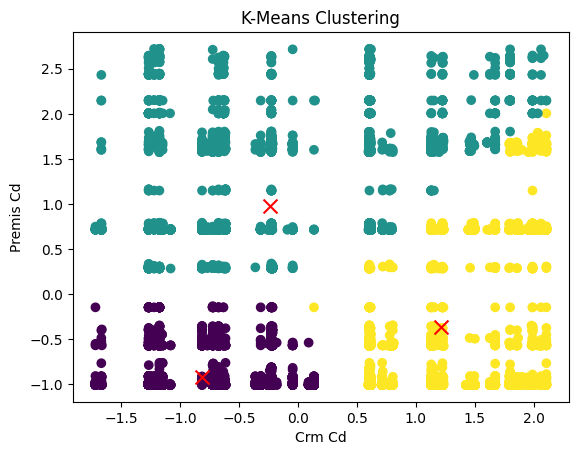

In [ ]:
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=etiquetas, cmap='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1], marker='x', c='r', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Crm Cd')
plt.ylabel('Premis Cd')
plt.show()

# Predicción  de crime Code

Haremos la predicción de los 4 Crime  code  mas  frecuentes ,  usando ambas tecnicas ,  SVM y  K-Means

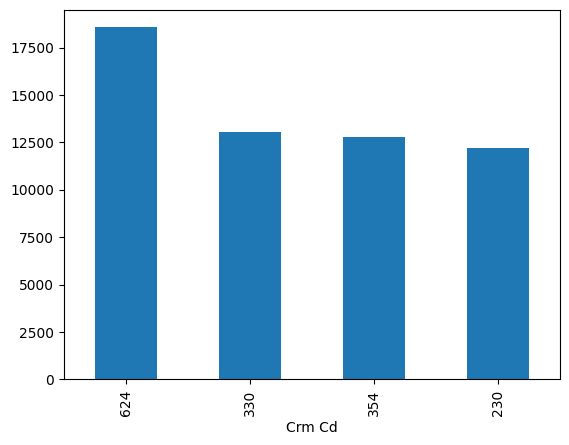

In [ ]:
conteo_valores = data['Crm Cd'].value_counts().nlargest(4)
conteo_valores.plot(kind='bar')
plt.show()

In [ ]:
data2=data[(data['Crm Cd'] == 624) | (data['Crm Cd']==330) | (data['Crm Cd']==354) | (data['Crm Cd']==230)]
data2.head()


,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Status
644088,9,4,15,1549,1,230,2,101.0,3
644103,5,4,18,1826,1,230,2,101.0,3
644105,3,4,12,1258,2,354,2,501.0,3
644113,11,4,9,991,2,354,2,501.0,3
644119,5,4,12,1218,1,230,2,222.0,1


In [ ]:
# Separamos en Variables independientes y objetivo
X = data2.drop(columns=['Crm Cd'])
y = data2['Crm Cd']

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rfe = RFE(rf_classifier, n_features_to_select=2)
X_rfe = rfe.fit_transform(X, y)

selected_features = X.columns[rfe.support_]
selected_features

Index(['Part 1-2', 'Premis Cd'], dtype='object')

In [ ]:
## Separamos de nuevo las variables reduciendo el set X
X = data2[['Part 1-2', 'Premis Cd']]
y = data2['Crm Cd']
#Separamos nuestros datasets de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Escalamos todos los features para evitar sesgos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

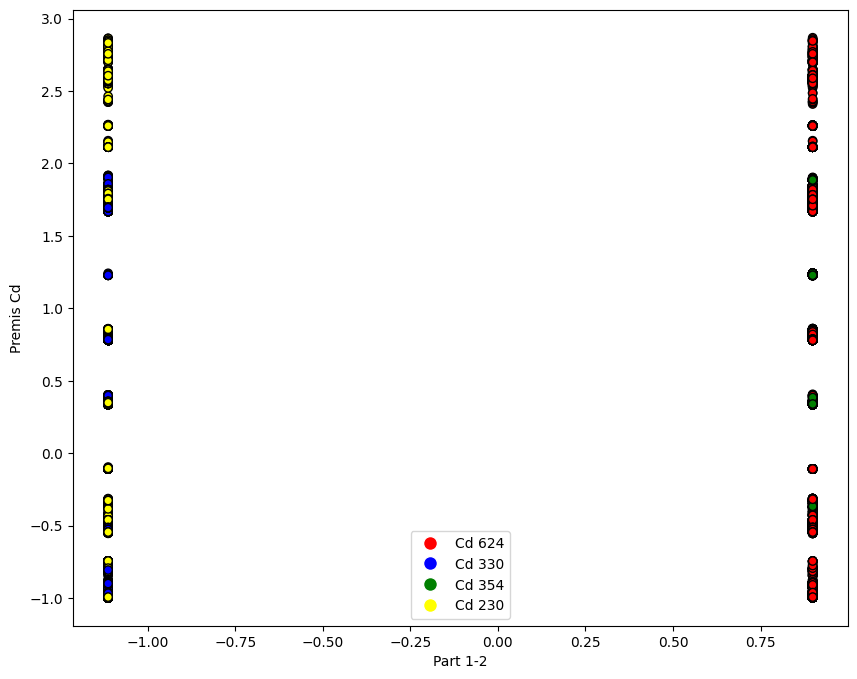

In [ ]:
color_map = {624: 'red', 330: 'blue', 354: 'green', 230: 'yellow'}
colors = [color_map.get(label, 'gray') for label in y_train]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

# Graficar los puntos de datos
scatter = ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=colors, edgecolors='k')

# Añadimos etiquetas y título
ax.set_xlabel('Part 1-2')
ax.set_ylabel('Premis Cd')

legend_labels = ['Cd 624', 'Cd 330', 'Cd 354', 'Cd 230']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in color_map.items()]
ax.legend(handles=legend_handles, labels=legend_labels)

plt.show()

#SVM

In [ ]:
svm_classifier= SVC(kernel='linear')
svm_classifier.fit(X_train_scaled, y_train)

y_pred = svm_classifier.predict(X_test_scaled)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         230       0.57      0.26      0.36      2425
         330       0.55      0.82      0.65      2627
         354       0.58      0.97      0.73      2591
         624       0.96      0.51      0.66      3682

    accuracy                           0.63     11325
   macro avg       0.66      0.64      0.60     11325
weighted avg       0.69      0.63      0.61     11325



# K-means

In [ ]:
kmeans = KMeans(n_clusters=4,n_init=10)
kmeans.fit(X_train_scaled)

KMeans(n_clusters=4, n_init=10)

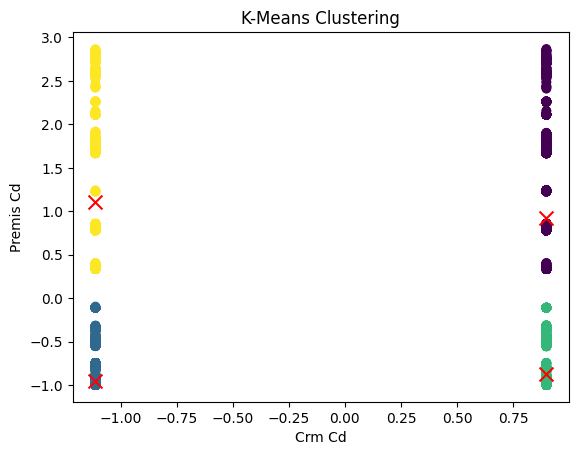

In [ ]:
centroides = kmeans.cluster_centers_
etiquetas = kmeans.labels_

plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=etiquetas, cmap='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1], marker='x', c='r', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Crm Cd')
plt.ylabel('Premis Cd')
plt.show()

# Referencias

[1]  Support Vector Machine (SVM). Mathworks.com. Recuperado el 12 de mayo de 2024, de https://la.mathworks.com/discovery/support-vector-machine.html

[2]  kmeans. Unioviedo.es. Recuperado el 12 de mayo de 2024, de https://www.unioviedo.es/compnum/laboratorios_py/kmeans/kmeans.html



